In [48]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('../HW 4/StackOverflow Survey 2024 for IDSUCSB Spring 2025 - Data.csv')
df

,JobSatisfactionScore,DeveloperType,AgeGroup,IsEmployed,IsStudent,IsStudentOrEmployed,IsRemote,HighestDegree,YearsCode,RoleType,...,UsesAI,SatisfactionFromDrivingStrategy,SatisfactionFromOpenSource,SatisfactionFromSecurity,SatisfactionFromDevExperience,SatisfactionFromLearning,SatisfactionFromBuilding,SatisfactionFromBeingSourceOfInfo,SatisfactionFromHardware,SatisfactionFromSoftwareMonitoringTools
0,0.8,Prior Developer,35,1.0,0,1,1.0,BS,20,Project manager,...,1,0.5,0.0,0.0,0.25,0.1,0.0,0.15,0.0,0.0
1,0.8,Current Developer,35,1.0,0,1,0.5,BS,20,"Developer, back-end",...,0,0.0,0.0,0.3,0.30,0.0,0.0,0.20,0.1,0.1
2,0.5,Current Developer,45,1.0,0,1,0.5,No College Degree,31,"Developer, full-stack",...,0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
3,1.0,Current Developer,25,1.0,0,1,0.5,No College Degree,12,"Developer, full-stack",...,1,0.1,0.0,0.1,0.60,0.1,0.1,0.00,0.0,0.0
4,0.6,Part Developer,25,1.0,0,1,0.5,MS,5,Other,...,1,0.9,1.0,1.0,1.00,0.9,0.9,1.00,0.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29121,0.8,Current Developer,45,1.0,0,1,0.5,No College Degree,18,"Developer, embedded applications or devices",...,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
29122,0.5,Current Developer,25,1.0,0,1,0.5,BS,13,Engineering manager,...,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
29123,0.8,Current Developer,Unknown,1.0,0,1,0.0,No College Degree,3,"Developer, mobile",...,1,0.2,0.1,0.3,0.60,0.7,0.3,0.10,0.1,0.4
29124,0.8,Current Developer,25,1.0,0,1,0.5,No College Degree,9,"Developer, full-stack",...,0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0


In [54]:
# take only the columns we need
remote_df = df[['JobSatisfactionScore', 'IsRemote', ]].reset_index()
remote_df

,index,JobSatisfactionScore,IsRemote
0,0,0.8,1.0
1,1,0.8,0.5
2,2,0.5,0.5
3,3,1.0,0.5
4,4,0.6,0.5
...,...,...,...
29121,29121,0.8,0.5
29122,29122,0.5,0.5
29123,29123,0.8,0.0
29124,29124,0.8,0.5


In [59]:
grouped_df = remote_df.groupby(['IsRemote', 'JobSatisfactionScore']).size().reset_index(name='Count')
grouped_df

,IsRemote,JobSatisfactionScore,Count
0,0.0,0.0,100
1,0.0,0.1,75
2,0.0,0.2,170
3,0.0,0.3,269
4,0.0,0.4,261
5,0.0,0.5,450
6,0.0,0.6,731
7,0.0,0.7,1172
8,0.0,0.8,1210
9,0.0,0.9,587


In [70]:
remote_count = remote_df.groupby('IsRemote').size().reset_index(name='Count')
remote_count

merge_df = pd.merge(grouped_df, remote_count, on='IsRemote')
merge_df['Proportion'] = merge_df['Count_x'] / merge_df['Count_y']
merge_df = merge_df.rename(columns={'Count_x': 'Count', 'Count_y': 'Total'})
merge_df

,IsRemote,JobSatisfactionScore,Count,Total,Proportion
0,0.0,0.0,100,5392,0.018546
1,0.0,0.1,75,5392,0.013909
2,0.0,0.2,170,5392,0.031528
3,0.0,0.3,269,5392,0.049889
4,0.0,0.4,261,5392,0.048405
5,0.0,0.5,450,5392,0.083457
6,0.0,0.6,731,5392,0.135571
7,0.0,0.7,1172,5392,0.217359
8,0.0,0.8,1210,5392,0.224407
9,0.0,0.9,587,5392,0.108865


In [73]:
# data cleaning
merge_df['IsRemote'] = merge_df['IsRemote'].replace({0.0: 'In Person', 0.5: 'Hybrid', 1.0: 'Remote'})
merge_df


,IsRemote,JobSatisfactionScore,Count,Total,Proportion
0,In Person,0.0,100,5392,0.018546
1,In Person,0.1,75,5392,0.013909
2,In Person,0.2,170,5392,0.031528
3,In Person,0.3,269,5392,0.049889
4,In Person,0.4,261,5392,0.048405
5,In Person,0.5,450,5392,0.083457
6,In Person,0.6,731,5392,0.135571
7,In Person,0.7,1172,5392,0.217359
8,In Person,0.8,1210,5392,0.224407
9,In Person,0.9,587,5392,0.108865


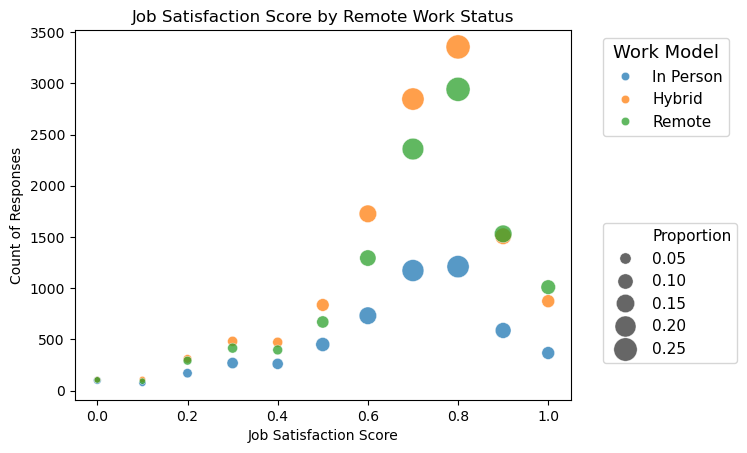

In [89]:
bubble_plot = sns.scatterplot(data=merge_df, x='JobSatisfactionScore', y='Count', size='Proportion', sizes=(20, 300), alpha=0.75, hue='IsRemote', palette='tab10')
bubble_plot

plt.title('Job Satisfaction Score by Remote Work Status')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count of Responses')

# plt.legend(title='Work Model', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
handles, labels = bubble_plot.get_legend_handles_labels()
color_legend = plt.legend(handles[1:4], labels[1:4], title='Work Model', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
size_legend = plt.legend(handles[4:], labels[4:], fontsize='11', bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.gca().add_artist(color_legend)

